<h1><center>FINAL PROJECT-PROGRAMMING ANALYTICS</center></h1> 
<h2 align="right">JAHNVI THAHIRANI<br>jahnvit2</h2> 

<h1><left>Analysis of Global Education</left></h1>

### Hypotheses:
#### 1) Better/Higher the number of Publications, Citations, Patents or HiCi Score from a university, higher is the number of awards (Nobel Prizes) won.
#### 2) Better the National Rank and quality of faculty of a university, higher is the percentage of international students enrolled.
#### 3) Western countries have a higher rate of promoting female Education.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import warnings
warnings.simplefilter("ignore")
import chart_studio.plotly as py
import plotly.graph_objs as go

In [13]:
import doctest
doctest.testmod()

**********************************************************************
File "__main__", line 6, in __main__.cleaningData
Failed example:
    cleaningData(dataset1, dataset2, dataset3)
Expected nothing
Got:
    (      world_rank                            institution         country  \
    200            1                     Harvard University             USA   
    201            2                    Stanford University             USA   
    202            3  Massachusetts Institute of Technology             USA   
    203            4                University of Cambridge  United Kingdom   
    204            5                   University of Oxford  United Kingdom   
    ...          ...                                    ...             ...   
    2195         996              University of the Algarve        Portugal   
    2196         997                  Alexandria University           Egypt   
    2197         998            Federal University of Ceará          Brazil   
   

TestResults(failed=1, attempted=4)



The first function cleans the datasets.
It returns the three cleaned datasets that I have to merge and two other subsets which I have to use separately.



In [11]:
def cleaningData(dataset1, dataset2, dataset3):
    '''
    
    :param dataset1: extract rank of the university based on publications, citations and patents
    :param dataset2: This dataset is used to extract the hici score and award score
    :param dataset3: This dataset is used to extract the rank based on quality of faculty.
    :return: Clean datasets required in analysis of all three hypotheses.
    >>> dataset1 = pd.read_csv('cwurData.csv')
    >>> dataset2 = pd.read_csv('shanghaiData.csv')
    >>> dataset3 = pd.read_csv('timesData.csv')
    >>> cleaningData(dataset1, dataset2, dataset3)
    
    '''
    dataset1 = dataset1.drop(['broad_impact','score','influence'],axis = 1)
    array = ['2014','2015']
    dataset1=dataset1.loc[dataset1['year'].isin(array)]
    
    dataset2.rename(columns = {'university_name':'institution'}, inplace = True)
    dataset2 = dataset2.drop(['world_rank','national_rank','total_score'],axis=1)
    dataset2 = dataset2.loc[dataset2['year'].isin(array)]
    
    hypo3Dataset = dataset3.fillna(0)
    hypo3Dataset = hypo3Dataset[hypo3Dataset.year == 2014]
    hypo3Dataset = hypo3Dataset[(hypo3Dataset['female_male_ratio']!=0)]
    
    westernCountries = ['United States of America', 'United Kingdom', 'France', 'Canada', 'Japan', 'Switzerland',
                    'Singapore','Australia','Sweden', 'Germany','South Korea','Belgium','France', 'Netherlands',
                   'Denmark', 'Finland', 'Republic of Ireland', 'Spain', 'New Zealand', 'Austria', 'Norway', 
                    'Italy', 'Iceland', 'Greece', 'Portugal']
    otherCountries = ['Israel', 'Hong Kong', 'China', 'South Africa', 'Taiwan', 'Israel', 'Turkey',
                      'Russian Federation', 'India', 'Brazil', 'Iran', 'Colombia', 'Thailand', 'Poland',
                     'Czech Republic', 'Saudi Arabia', 'Estonia']

    hypo3Dataset['num_students']=hypo3Dataset['num_students'].astype('str')
    hypo3Dataset['num_students'] = [i.replace(',','') for i in list(hypo3Dataset.num_students)]
    hypo3Dataset['num_students'] = hypo3Dataset['num_students'].astype(int)

    hypo3Dataset['num_female_students']=hypo3Dataset.female_male_ratio.apply(lambda x: x[0:2]).astype(int).div(100)*hypo3Dataset['num_students']
    hypo3Dataset['num_female_students']=hypo3Dataset['num_female_students'].astype(int)
    hypo3Dataset['num_male_students'] = hypo3Dataset['num_students'] - hypo3Dataset['num_female_students']

    TestDataset = hypo3Dataset.groupby(['country'])['num_female_students','num_male_students','num_students'].agg('sum').reset_index()
    TestDataset['perc_male_per_country'] = TestDataset.num_male_students.div(TestDataset.num_students)*100
    TestDataset['perc_male_per_country'] = TestDataset['perc_male_per_country'].astype(int)
    TestDataset['perc_female_per_country'] = TestDataset.num_female_students.div(TestDataset.num_students)*100
    TestDataset['perc_female_per_country'] = TestDataset['perc_female_per_country'].astype(int)

    TestDataset1 = TestDataset.loc[TestDataset['country'].isin(westernCountries)]
    TestDataset2 = TestDataset.loc[TestDataset['country'].isin(otherCountries)]


    dataset3.rename(columns = {'university_name' : 'institution'}, inplace = True)
    dataset3 = dataset3.drop(['world_rank', 'country', 'teaching', 'income','citations'], axis=1)
    dataset3 = dataset3.loc[dataset3['year'].isin(array)]
    
    return dataset1, dataset2, dataset3, TestDataset1, TestDataset2

The second function merges three datasets into one and returns merged datasets and two other subsets for future use. 

In [3]:
def mergingData(dataset1, dataset2, dataset3):
    '''
    :param dataset1: extract rank of the university based on publications, citations and patents
    :param dataset2: This dataset is used to extract the hici score and award score
    :param dataset3: This dataset is used to extract the rank based on quality of faculty.
    :return: three datasets merged as one and it's subsets.
    >>> dataset1 = pd.read_csv('cwurData.csv')
    >>> dataset2 = pd.read_csv('shanghaiData.csv')
    >>> dataset3 = pd.read_csv('timesData.csv')
    >>> mergingData(dataset1, dataset2, dataset3)
    
    '''
    merged = pd.merge(dataset1,dataset2, on=['institution','year'], how = 'left')
    mergedData = pd.merge(merged, dataset3, on=['institution','year'], how = 'left')
    mergedData = mergedData.fillna(0)
    
    mergedData['num_students']=mergedData['num_students'].astype('str')
    mergedData['num_students'] = [i.replace(',','') for i in list(mergedData.num_students)]
    mergedData['num_students'] = mergedData['num_students'].astype(int)
    mergedData['international_students'] = np.where(mergedData['international_students']==0,'0%',mergedData['international_students'])
    mergedData['num_int_students']=mergedData.international_students.apply(lambda x: x.strip('%')).astype(int).div(100)*mergedData['num_students']
    mergedData = mergedData[(mergedData['hici']!=0)]
    mergedData = mergedData[(mergedData['award']!=0)]
    mergedData = mergedData[(mergedData['publications']!=0)]
    mergedData = mergedData[(mergedData['citations']!=0)]


    
    mergedData1 = mergedData[mergedData.year == 2014]
    mergedData2 = mergedData[mergedData.year == 2015]
    
    return mergedData, mergedData1, mergedData2
    

Plot for first hypothesis: Better/Higher the number of Publications, Citations, Patents or HiCi Score from a university, higher is the number of awards (Nobel Prizes) won.  

In [15]:
def plot_Hypothesis1(sampledData1, sampledData2):
    '''
    
    :param sampledData1: data subset for analysis of hypothesis 1 for the year 2014 
    :param sampledData2: data subset for analysis of hypothesis 1 for the year 2015
    :return: plot for hypothesis 1
    >>> dataset1 = pd.read_csv('cwurData.csv')
    >>> dataset2 = pd.read_csv('shanghaiData.csv')
    >>> plot_Hypothesis1(dataset1, dataset2)
    
    '''
    fig = plt.figure(figsize= (10,10))
    fig.suptitle('Analysis for 2014', fontsize=20,fontname = 'Times New Roman',fontweight="bold")

    plt.subplots_adjust(left=None, bottom=0.1, right=None, top=0.9, wspace=0.4, hspace=0.4)

    plt.subplot(2, 2, 1)
    (markerline, stemlines, baseline) = plt.stem(sampledData1['hici'], sampledData1['award'])
    plt.setp(markerline, color='black');plt.setp(stemlines, color='grey');plt.setp(baseline, visible=False)
    plt.title('hici score vs award score',fontsize=14,fontname = 'Times New Roman')
    plt.xlabel('hici score', fontsize=14,fontname = 'Times New Roman')
    plt.ylabel('award score',fontsize=14,fontname = 'Times New Roman')


    plt.subplot(2, 2, 2)
    (markerline, stemlines, baseline) = plt.stem(sampledData1['publications'], sampledData1['award'])
    plt.setp(markerline, color='navy');plt.setp(stemlines, color='grey');plt.setp(baseline, visible=False)
    plt.title('University rank based on publications vs award score', fontsize=14,fontname = 'Times New Roman')
    plt.xlabel('University rank (publications)', fontsize=14,fontname = 'Times New Roman')
    plt.ylabel('award score', fontsize=14,fontname = 'Times New Roman')



    plt.subplot(2, 2, 3)
    (markerline, stemlines, baseline) = plt.stem(sampledData1['citations'], sampledData1['award'])
    plt.setp(markerline, color='navy');plt.setp(stemlines, color='grey');plt.setp(baseline, visible=False)
    plt.title('University rank based on citations vs award score', fontsize=14,fontname = 'Times New Roman')
    plt.xlabel('University rank (citations)', fontsize=14,fontname = 'Times New Roman')
    plt.ylabel('award score', fontsize=14,fontname = 'Times New Roman')

    plt.subplot(2, 2, 4)
    (markerline, stemlines, baseline) = plt.stem(sampledData1['patents'], sampledData1['award'])
    plt.setp(markerline, color='black');plt.setp(stemlines, color='grey');plt.setp(baseline, visible=False)
    plt.title('University rank based on patents vs award score', fontsize=14,fontname = 'Times New Roman')
    plt.xlabel('University rank (patent)', fontsize=14,fontname = 'Times New Roman')
    plt.ylabel('award score', fontsize=14,fontname = 'Times New Roman')

    plt.show()

    fig = plt.figure(figsize= (10,10))
    fig.suptitle('Analysis for 2015', fontsize=20,fontname = 'Times New Roman',fontweight="bold")

    plt.subplots_adjust(left=None, bottom=0.1, right=None, top=0.9, wspace=0.4, hspace=0.4)

    plt.subplot(2, 2, 1)
    (markerline, stemlines, baseline) = plt.stem(sampledData2['hici'], sampledData2['award'])
    plt.setp(markerline, color='black');plt.setp(stemlines, color='grey');plt.setp(baseline, visible=False)
    plt.title('hici score vs award score',fontsize=14,fontname = 'Times New Roman')
    plt.xlabel('hici score', fontsize=14,fontname = 'Times New Roman')
    plt.ylabel('award score',fontsize=14,fontname = 'Times New Roman')


    plt.subplot(2, 2, 2)
    (markerline, stemlines, baseline) = plt.stem(sampledData2['publications'], sampledData2['award'])
    plt.setp(markerline, color='navy');plt.setp(stemlines, color='grey');plt.setp(baseline, visible=False)
    plt.title('University rank based on publications vs award score', fontsize=14,fontname = 'Times New Roman')
    plt.xlabel('University rank (publications)', fontsize=14,fontname = 'Times New Roman')
    plt.ylabel('award score', fontsize=14,fontname = 'Times New Roman')

    plt.subplot(2, 2, 3)
    (markerline, stemlines, baseline) = plt.stem(sampledData2['citations'], sampledData2['award'])
    plt.setp(markerline, color='navy');plt.setp(stemlines, color='grey');plt.setp(baseline, visible=False)
    plt.title('University rank based on citations vs award score', fontsize=14,fontname = 'Times New Roman')
    plt.xlabel('University rank (citations)', fontsize=14,fontname = 'Times New Roman')
    plt.ylabel('award score', fontsize=14,fontname = 'Times New Roman')

    plt.subplot(2, 2, 4)
    (markerline, stemlines, baseline) = plt.stem(sampledData2['patents'], sampledData2['award'])
    plt.setp(markerline, color='black');plt.setp(stemlines, color='grey');plt.setp(baseline, visible=False)
    plt.title('University rank based on patents vs award score', fontsize=14,fontname = 'Times New Roman')
    plt.xlabel('University rank (patent)', fontsize=14,fontname = 'Times New Roman')
    plt.ylabel('award score', fontsize=14,fontname = 'Times New Roman')

    plt.show()

Plot for second Hypothesis: Better the National Rank and quality of faculty of a university, higher is the percentage of international students enrolled.

In [16]:
def plot_Hypothesis2(sampledData3, sampledData4):
    '''
    
    :param sampledData3: data subset for analysis of hypothesis 2 for the year 2014 
    :param sampledData4: data subset for analysis of hypothesis 2 for the year 2015
    :return:plot for hypothesis 2
    >>> dataset1 = pd.read_csv('cwurData.csv')
    >>> dataset2 = pd.read_csv('shanghaiData.csv')
    >>> plot_Hypothesis1(dataset1, dataset2)
    
    '''
    fig = go.Figure()
    fig.add_trace(go.Scatter(
    x = sampledData3['national_rank'],
    y = sampledData3['international_students'],
    marker=dict(color="plum", size=12),
    mode="markers",
    name="2014",
    ))

    fig.add_trace(go.Scatter(
    x = sampledData4['national_rank'],
    y = sampledData4['international_students'],
    marker=dict(color="skyblue", size=12),
    mode="markers",
    name="2015",
    ))

    fig.update_layout(title={
                    'text': "National Rank vs Percentage of International Students",
                    'y':0.9,
                    'x':0.5,
                    'xanchor': 'center',
                    'yanchor': 'top'},
                  xaxis_title="National Rank of University",
                  yaxis_title="Percent of International Students")

    fig.show()


    fig = go.Figure()
    fig.add_trace(go.Scatter(
    x = sampledData3['quality_of_faculty'],
    y = sampledData3['international_students'],
    marker=dict(color="plum", size=12),
    mode="markers",
    name="2014",
    ))

    fig.add_trace(go.Scatter(
    x = sampledData4['quality_of_faculty'],
    y = sampledData4['international_students'],
    marker=dict(color="skyblue", size=12),
    mode="markers",
    name="2015",
    ))

    fig.update_layout(title={
                    'text': "Rank of University based on quality of faculty vs percent of International Students",
                    'y':0.9,
                    'x':0.5,
                    'xanchor': 'center',
                    'yanchor': 'top'},
                  xaxis_title="Rank of University (quality of faculty)",
                  yaxis_title="percent of International Students")

    fig.show()



Plot for third hypothesis: Western countries have a higher rate of promoting female Education.

In [19]:
def plot_Hypothesis3(TestDataset1, TestDataset2):
    '''
    :param TestDataset1: data subset for analysis of hypothesis 3 for western countries 
    :param TestDataset2: data subset for analysis of hypothesis 3 for all other countries
    :return: plot for hypothesis 3
    >>> dataset1 = pd.read_csv('cwurData.csv')
    >>> dataset2 = pd.read_csv('shanghaiData.csv')
    >>> plot_Hypothesis1(dataset1, dataset2)
    
    '''
    fig = go.Figure()
    fig.add_trace(go.Bar(
        x = TestDataset1['country'],
        y = TestDataset1['perc_female_per_country'],
        name = 'female',
        marker_color='darkred'
    ))

    fig.add_trace(go.Bar(
        x = TestDataset1['country'],
        y = TestDataset1['perc_male_per_country'],
        name = 'male',
        marker_color='dimgray' 
    ))

    fig.update_layout( title={
                    'text': "Female Education in Western Countries",
                    'y':0.9,
                    'x':0.5,
                    'xanchor': 'center',
                    'yanchor': 'top'}, template = "plotly_dark",
                      xaxis_title="Countries",
                      yaxis_title="gender wise distribution of students in percentage", barmode='stack')

    fig.show()
    
    fig = go.Figure()
    fig.add_trace(go.Bar(
        x = TestDataset2['country'],
        y = TestDataset2['perc_female_per_country'],
        name = 'female',
        marker_color='darkred'
    ))

    fig.add_trace(go.Bar(
        x = TestDataset2['country'],
        y = TestDataset2['perc_male_per_country'],
        name = 'male',
        marker_color='dimgray'
    ))

    fig.update_layout( title={
                    'text': "Female Education in Other Countries",
                    'y':0.9,
                    'x':0.5,
                    'xanchor': 'center',
                    'yanchor': 'top'}, template = "plotly_dark",
                      xaxis_title="Countries",
                      yaxis_title="gender wise distribution of students in percentage", barmode='stack')

    fig.show()

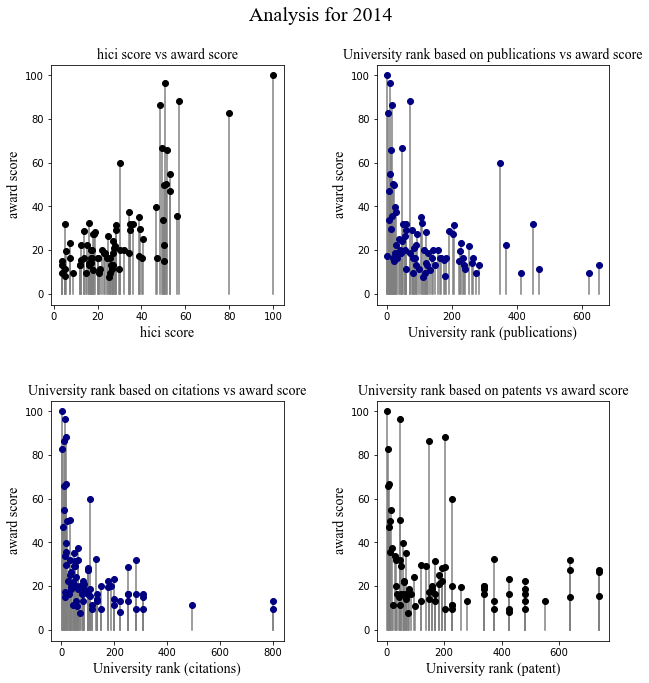

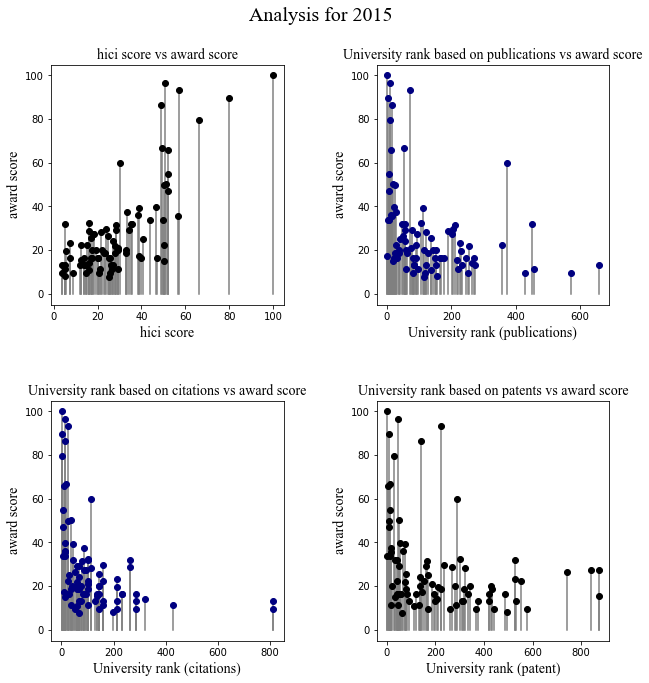

In [20]:
if __name__ == "__main__":
    
    dataset1 = pd.read_csv('cwurData.csv')
    dataset2 = pd.read_csv('shanghaiData.csv')
    dataset3 = pd.read_csv('timesData.csv')
    
    dataset1, dataset2, dataset3, TestDataset1, TestDataset2 = cleaningData(dataset1, dataset2, dataset3)
    mergedData, mergedData1, mergedData2 = mergingData(dataset1, dataset2, dataset3)
    
    sampledData1 = mergedData1[(mergedData1['award']!=0)]
    sampledData2 = mergedData2[(mergedData2['award']!=0)]
    
    sampledData3 = mergedData1[(mergedData1['num_int_students']!=0)]
    sampledData4 = mergedData2[(mergedData2['num_int_students']!=0)]
    
    plot_Hypothesis1(sampledData1, sampledData2)
    plot_Hypothesis2(sampledData3, sampledData4)
    plot_Hypothesis3(TestDataset1, TestDataset2)